In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('csv_chunks_sentiment.csv')

df.drop(columns=['leg','date','language','chunk','tokens'], axis=1, inplace=True)

def classify_sentiment(row):
    positive_score = row['very_positive_BERT'] + row['positive_BERT']
    negative_score = row['very_negative_BERT'] + row['negative_BERT']
    
    if positive_score > negative_score:
        return '1'
    else:
        return '-1'
    
df["class"], uniques = pd.factorize(df["class"])
df['group'], uniques = pd.factorize(df['group'])

df['sentiment'] = df.apply(classify_sentiment, axis=1)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)

counts = df['sentiment'].value_counts()

counts

sentiment
-1    1679
1     1470
Name: count, dtype: int64

In [7]:
df.dropna(inplace=True)

df

,ID_file,class,obj_pos,ID_cons,year_birth,gender,group,position,length,very_negative_BERT,negative_BERT,neutral_BERT,positive_BERT,very_positive_BERT,sentiment
0,47801,0,1,201.0,1975.0,1,0,2,3141,0.008774,0.017888,0.075363,0.387717,0.510258,1
1,47801,0,1,77.0,1975.0,1,1,4,914,0.003549,0.008610,0.127961,0.458826,0.401054,1
2,47801,0,1,224.0,1986.0,1,2,6,1290,0.009853,0.019888,0.075282,0.395171,0.499806,1
3,47801,0,1,206.0,1966.0,0,3,8,1054,0.011296,0.030934,0.091448,0.370631,0.495691,1
4,47801,0,1,293.0,1968.0,1,1,10,857,0.004999,0.013256,0.101999,0.432239,0.447508,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,47712,63,24,198.0,1964.0,1,7,2,3924,0.083101,0.228468,0.317791,0.285857,0.084783,1
3145,47712,63,24,201.0,1975.0,1,0,4,392,0.011394,0.045980,0.193305,0.437839,0.311481,1
3146,47713,20,25,185.0,1983.0,1,5,2,3138,0.112292,0.290895,0.296555,0.220730,0.079527,-1
3147,47713,20,25,152.0,1962.0,1,1,4,3125,0.067683,0.169414,0.244999,0.343003,0.174901,1


In [8]:
X = df[['class', 'gender', 'length', 'position', 'obj_pos', 'group','ID_cons','year_birth']]  # Features
y = df['sentiment']  # Target

# Codifica la variabile target (sentiment) con LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividi il dataset in train e test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crea un modello di regressione logistica
model = LogisticRegression(max_iter=200)

# Allena il modello sui dati di addestramento
model.fit(X_train, y_train)

# Fai le previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Genera un report di classificazione
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.69      0.63       498
           1       0.55      0.42      0.48       443

    accuracy                           0.57       941
   macro avg       0.56      0.56      0.55       941
weighted avg       0.56      0.57      0.56       941



/home/sylcherry/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definiamo le feature (X) e il target (y)
X = df[['gender','class', 'length', 'position', 'obj_pos', 'group','year_birth']]
y = df['sentiment']

# Dividiamo il dataset in train e test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inizializza e addestra il Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predizioni
y_pred_dt = dt_model.predict(X_test)

# Valutazione
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.59
Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.85      0.69       498
           1       0.64      0.30      0.41       443

    accuracy                           0.59       941
   macro avg       0.61      0.58      0.55       941
weighted avg       0.61      0.59      0.56       941



In [10]:
# Inizializza e addestra il Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predizioni
y_pred_rf = rf_model.predict(X_test)

# Valutazione
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.64
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.72      0.68       498
           1       0.64      0.55      0.59       443

    accuracy                           0.64       941
   macro avg       0.64      0.64      0.64       941
weighted avg       0.64      0.64      0.64       941



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definiamo la griglia di iperparametri
param_grid = {
    "n_estimators": [100, 200, 300],  # Numero di alberi nella foresta
    "max_depth": [10, 20, None],  # Profondità massima
    "min_samples_split": [2, 5, 10],  # Minimo campioni per dividere un nodo
    "min_samples_leaf": [1, 2, 4],  # Minimo campioni in una foglia
    "max_features": ["sqrt", "log2"],  # Numero di feature considerate per split
    "criterion": ["gini", "entropy"],
}

# Inizializza il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inizializza Grid Search con validazione incrociata
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=5,  # Numero di folds per cross-validation
    scoring="accuracy",  # Metri di valutazione (puoi provare 'f1', 'roc_auc', ecc.)
    n_jobs=-1,  # Usa tutti i core della CPU
    verbose=2  # Mostra il progresso
)

# Esegui la ricerca
grid_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print(f"Migliori parametri: {grid_search.best_params_}")

# Usa il miglior modello per fare previsioni
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Valutazione del modello ottimizzato
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tot

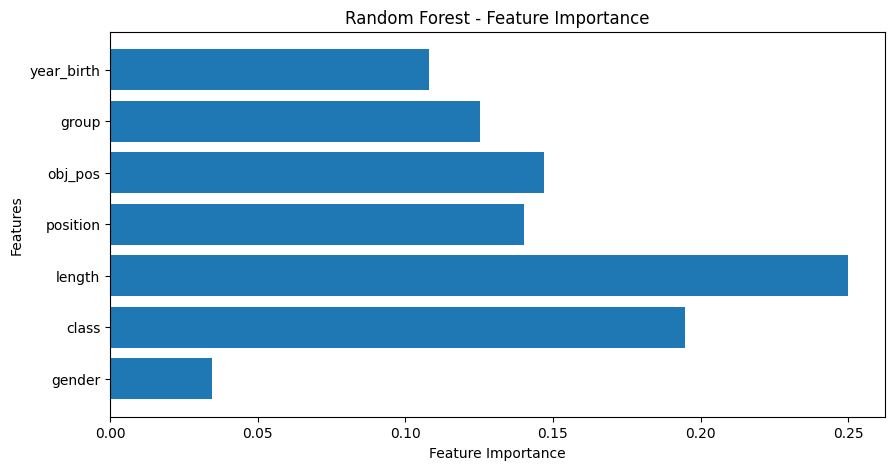

In [12]:
import matplotlib.pyplot as plt

# Ottieni l'importanza delle feature
feature_importance = best_rf_model.feature_importances_
features = X.columns

# Plot delle feature più importanti
plt.figure(figsize=(10,5))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance")
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Selezione delle feature
X = df[['class', 'gender', 'length', 'position', 'obj_pos', 'group', 'ID_cons', 'year_birth']]
y = df['sentiment']

# Encoding della variabile target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Definizione del modello XGBoost
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Definizione dei parametri per Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Numero di alberi
    'max_depth': [3, 5, 7],  # Profondità degli alberi
    'learning_rate': [0.01, 0.1, 0.3],  # Velocità di apprendimento
    'subsample': [0.7, 0.9, 1.0],  # Percentuale di dati usata per ogni albero
    'colsample_bytree': [0.7, 0.9, 1.0]  # Percentuale di feature usate per ogni albero
}

# Grid Search con 5-fold Cross Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Best Parameters:", grid_search.best_params_)

# Modello ottimizzato
best_model = grid_search.best_estimator_

# Predizioni sul test set
y_pred = best_model.predict(X_test)

# Valutazione del modello
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Report di classificazione
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estim

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estim

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=3

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.9s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=1

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.4s

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=3

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estima

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.7s

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.8s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:30] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.8s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=30

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=20

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:31] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.9s[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.8s

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.9s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   1.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.4s[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=100,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.5s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.5s

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.7s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:36] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.5s[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.6s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.9s


/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=300,

/home/sylcherry/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
